<a href="https://colab.research.google.com/github/mariotko9/aprendizado_de_maquina/blob/main/Checkout2ApMaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# monta o drive para usar os dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 1 Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Carregar o dataset
df = pd.read_csv('/content/drive/My Drive/abalone.csv')


In [10]:
# Mostra as 5 primeiras e 5 ultimas linhas, mostra quantidade de linhas e
# colunas
print(df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [5]:
# 2.1 Exploração inicial dos dados
print(df.shape)       # Exibe quantidade de linhas (tuplas) e colunas
print(df.info())      # Exibe as informações do dataset
print(df.describe())  # Resumo descritivo das colunas numéricas

(4177, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min     

In [13]:
# 2.2 Verificar valores ausentes (nulos)
print(df.isnull().sum())

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Sex_I             0
Sex_M             0
dtype: int64


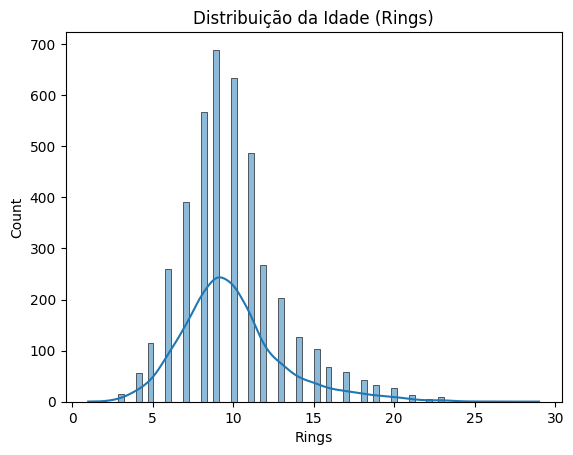

In [7]:

# 2.3 Visualização das distribuições de Idade (Rings)
sns.histplot(df['Rings'], kde=True)
plt.title('Distribuição da Idade (Rings)')
plt.show()


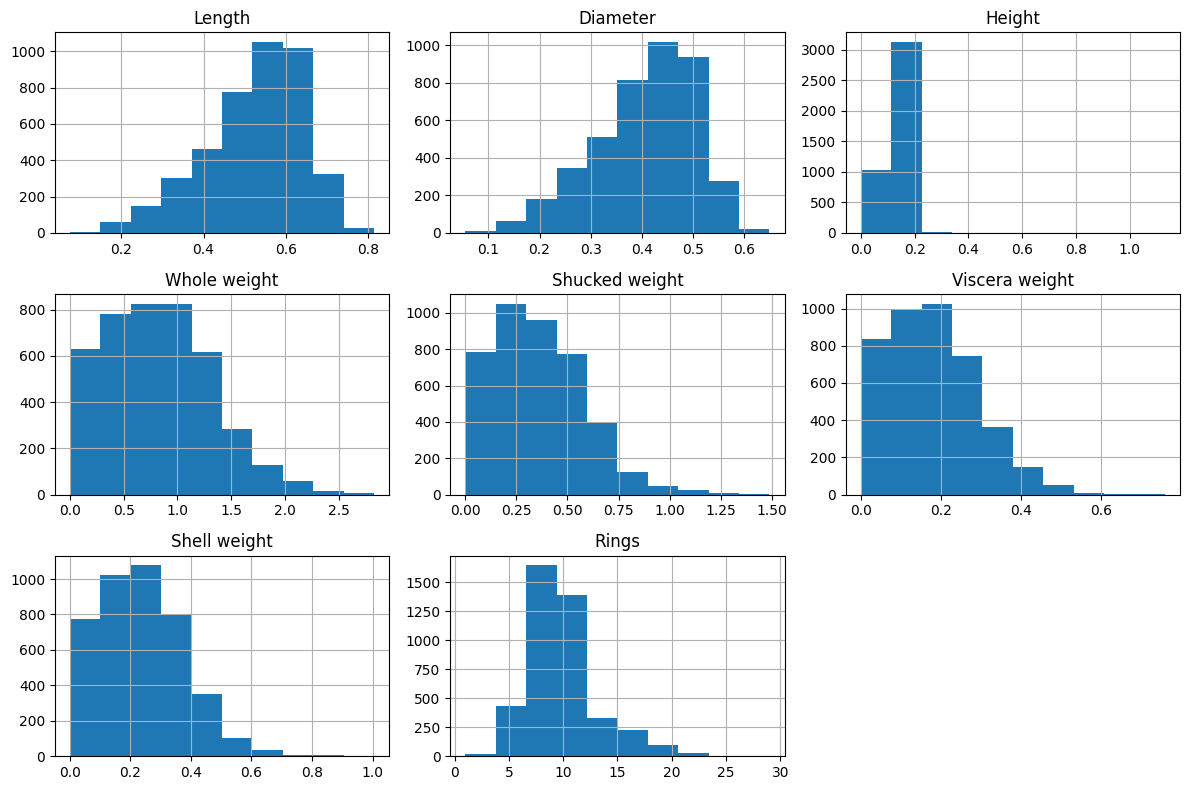

In [15]:
# 2.4 Histograma de todas as variáveis
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

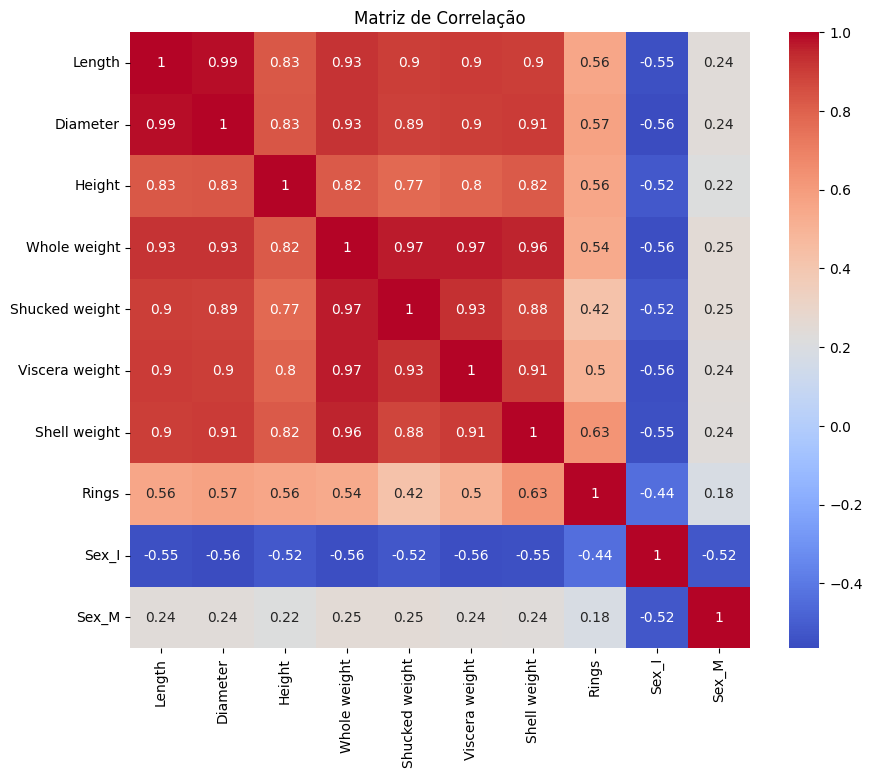

In [16]:
# 2.5 Mapa de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [11]:
# 3 Preparação dos dados
# Transformar variável categórica 'Sex' em dummies
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Separar variáveis
X = df.drop('Rings', axis=1)
y = df['Rings']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# 4 Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# 5 Avaliação do modelo
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')


R²: 0.55
RMSE: 2.21


In [ ]:
# 6 Interpretação
# R² mostra o quanto o modelo explica da variação da idade.
# RMSE indica o erro médio das previsões.
# Se os valores não forem satisfatórios, pode ser necessário testar outros modelos ou transformar variáveis.

**Discussão dos Resultados**

O modelo de regressão linear múltipla foi aplicado com sucesso para prever a idade dos abalones com base em características físicas.

- O R² obtido foi de aproximadamente 0.55, o que indica que o modelo consegue explicar a variação na idade.
- O RMSE ficou em torno de 2.21, representando o erro médio nas previsões.

